# Distribution
> the way in which something is shared out among a group or spread over an area

### Random Variable
> a variable whose value is subject to variations due to chance (i.e. randomness, in a mathematical sense). A random variable can take on a set of possible different values (similarly to other mathematical variables), each with an associated probability [wiki](https://en.wikipedia.org/wiki/Random_variable)

**Types**

1. Discrete Random Variables <br>
    Eg: Genders of the buyers buying shoe
2. Continuous Random Variables <br>
    Eg: Shoe Sales in a quarter
    
### Probability Distribution
> Assigns a probability to each measurable subset of the possible outcomes of a random experiment, survey, or procedure of statistical inference. [wiki](https://en.wikipedia.org/wiki/Probability_distribution)

#### Probability Mass Function
probability mass function (pmf) is a function that gives the probability that a discrete random variable is exactly equal to some value

#### Discrete probability distribution(Cumulative Mass Function)
probability distribution characterized by a probability mass function

#### Probability Density Function
function that describes the relative likelihood for this random variable to take on a given value

#### Continuous probability distribution(Cumulative Density function)
probability that the variable takes a value less than or equal to `x`

### Central Limit Theorem
Given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed, regardless of the underlying distribution. [wiki](https://en.wikipedia.org/wiki/Central_limit_theorem)

#### Normal Distribution
A bell shaped distribution. It is also called Gaussian distribution

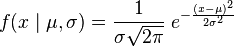



**PDF**
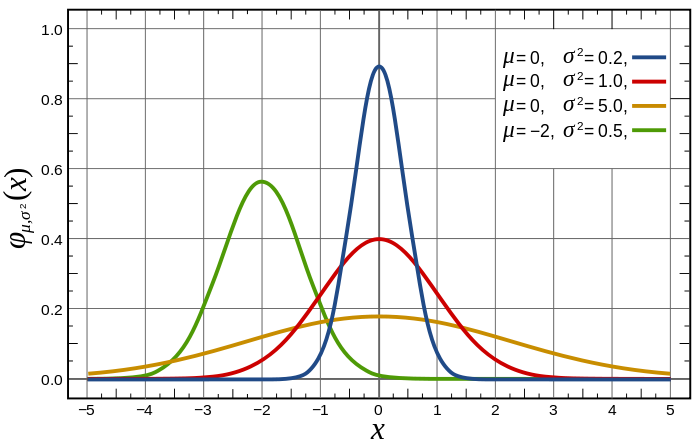

**CDF**
<br>
<br>

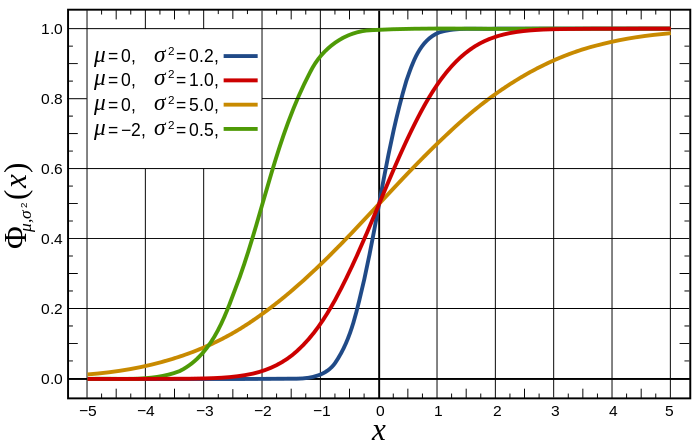



#### Binomial Distribution

Binomial distribution with parameters `n` and `p` is the discrete probability distribution of the number of successes in a sequence of n independent yes/no experiments, each of which yields success with probability p. A success/failure experiment is also called a Bernoulli experiment or Bernoulli trial; when n = 1, the binomial distribution is a Bernoulli distribution  [wiki](https://en.wikipedia.org/wiki/Binomial_distribution)
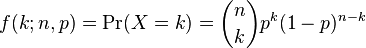


#### Exponential Distribution
Probability distribution that describes the time between events in a Poisson process, i.e. a process in which events occur continuously and independently at a constant average rate. It has the key property of being memoryless. [wiki](https://en.wikipedia.org/wiki/Exponential_distribution)
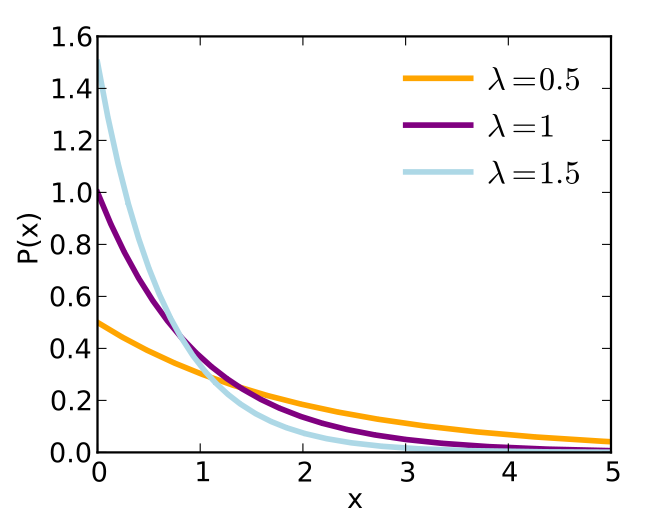

#### Uniform distribution
All values have the same frequency [wiki](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous))


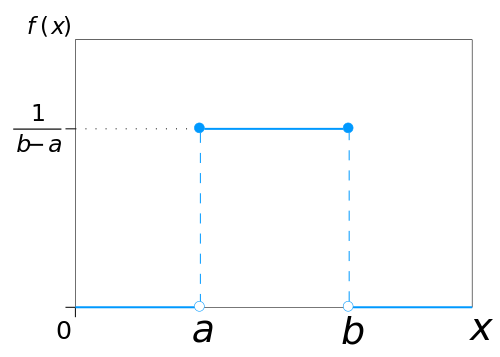




### 6-sigma philosophy
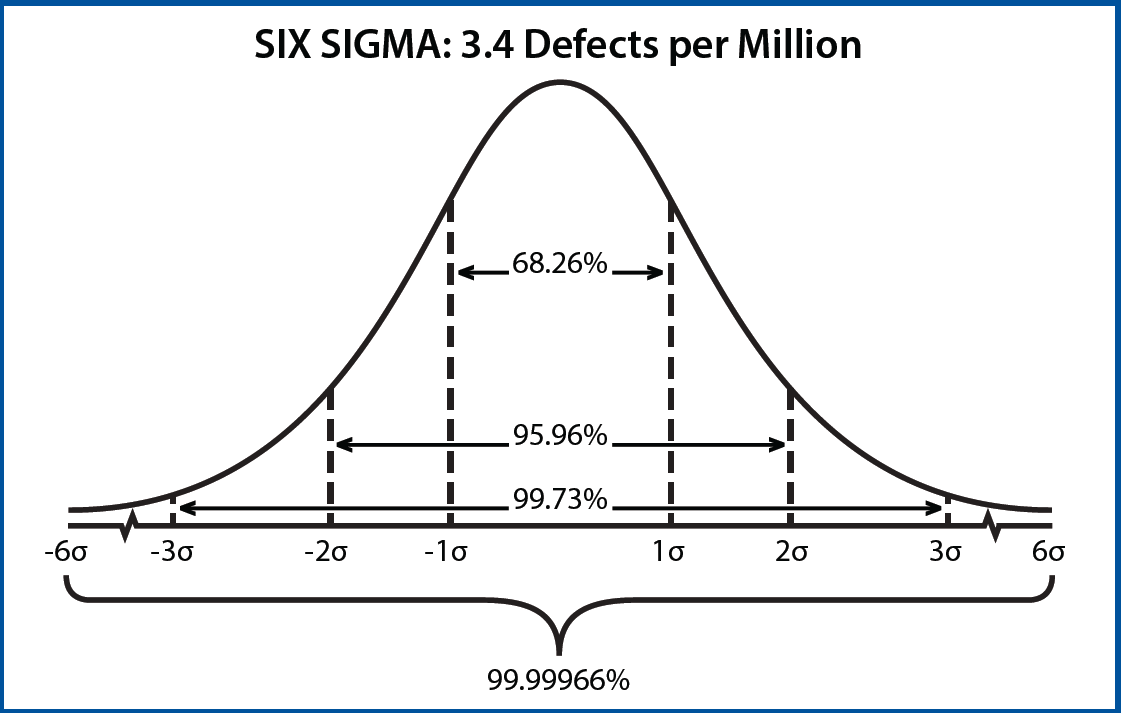

### Histograms

Most commonly used representation of a distribution.

Let's plot distribution of weed prices for 2014

In [ ]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [ ]:
#Import the data
cars = pd.read_csv("cars_v1.csv", encoding="ISO-8859-1")

In [ ]:
#Replace missing values in Mileage with mean
cars.Mileage.fillna(cars.Mileage.mean(), inplace=True)

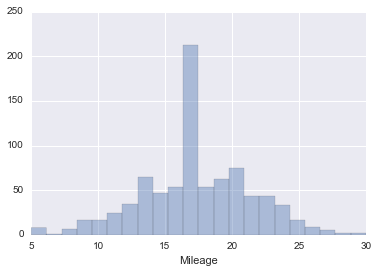

In [ ]:
sns.distplot(cars.Mileage, kde=False)

**Question If you randomly select a car, what is the probability, with equal chances of selecting any of the make available in our dataset, that the mileage will be greater than 25? **

In [ ]:
sns.distplot(cars.Mileage, bins=range(0,50,1))

#Using `scipy` to use distribution

In [ ]:
from scipy import stats
import scipy as sp
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

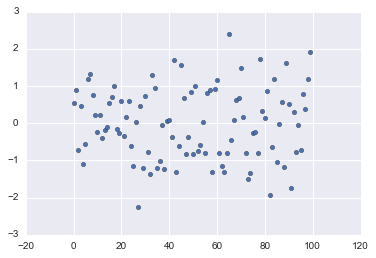

In [ ]:
#Generate random numbers that are normally distributed
random_normal = sp.randn(100)
plt.scatter(range(100), random_normal)

In [ ]:
print "mean:", random_normal.mean(), " variance:", random_normal.var()

In [ ]:
#Create a normal distribution with mean 2.5 and standard deviation 1.7

n = stats.norm(loc=2.5, scale=1.7)

In [ ]:
#Generate random number from that distribution
n.rvs()

0.542441366031919

In [ ]:
#for the above normal distribution, what is the pdf at 0.3?
n.pdf(0.3)

0.10157711386142985

In [ ]:
#Binomial distribution with `p` = 0.4 and number of trials as 15

In [ ]:
stats.binom.pmf(range(15), 10, 0.4)

array([  6.04661760e-03,   4.03107840e-02,   1.20932352e-01,
         2.14990848e-01,   2.50822656e-01,   2.00658125e-01,
         1.11476736e-01,   4.24673280e-02,   1.06168320e-02,
         1.57286400e-03,   1.04857600e-04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

### Standard Error

It is a measure of how far the estimate to be off, on average. More technically, it is the standard deviation of the sampling distribution of a statistic(mostly the mean). Please do not confuse it with *standard deviation*. Standard deviation is a measure of the variability of the observed quantity. Standard error, on the other hand, describes variability of the estimate. 



To illustrate this, let's do the following.

Not all the make and models are available in our dataset. Also, we had to impute some of the values. 

Let's say that a leading automobile magazine did an extensive survey and printed that the mean mileage is 22.7. 

Compute standard deviation and standard error for the mean for our dataset

In [ ]:
cars.head()

,Make,Model,Price,Type,ABS,BootSpace,GearType,AirBag,Engine,FuelCapacity,Mileage
0,Ashok Leyland Stile,Ashok Leyland Stile LE 8-STR (Diesel),750,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
1,Ashok Leyland Stile,Ashok Leyland Stile LS 8-STR (Diesel),800,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
2,Ashok Leyland Stile,Ashok Leyland Stile LX 8-STR (Diesel),830,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
3,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR (Diesel),850,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
4,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR Alloy (Diesel),880,MPV,No,500.0,Manual,No,1461.0,50.0,20.7


In [ ]:
#Mean and standard deviation of car's mileage
print(" Sample Mean:", cars.Mileage.mean(), "\n", "Sample Standard Deviation:", cars.Mileage.std())

 Sample Mean: 17.480407854984836 
 Sample Standard Deviation: 4.086421315837099


In [ ]:
print(" Max Mileage:", cars.Mileage.max(), "\n", "Min Mileage:", cars.Mileage.min())

 Max Mileage: 30.0 
 Min Mileage: 5.0


 We will bootstrap samples from actual observed data 10,000 times and compute difference between sample mean and actual mean. Find root mean squared error to get standard error

In [ ]:
def squared_error(bootstrap_sample, actual_mean):
    return np.square(bootstrap_sample.mean() - actual_mean)

def experiment_for_computing_standard_error(observed_mileage, number_of_times, actual_mean):
    bootstrap_mean = np.empty([number_of_times, 1], dtype=np.int32)
    bootstrap_sample = np.random.choice(observed_mileage, size=[observed_mileage.size, number_of_times], replace=True)
    bootstrap_squared_error = np.apply_along_axis(squared_error, 1, bootstrap_sample, actual_mean)
    return np.sqrt(bootstrap_squared_error.mean())

In [ ]:
#Standard error of the estimate for mean
experiment_for_computing_standard_error(np.array(cars.Mileage), 10, 22.7)

5.3759376209847147